<a href="https://colab.research.google.com/github/silvererudite/PRESC/blob/master/dev/silvererudite_task2/PRESC_startuptask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [189]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
dataset=pd.read_csv("vehicles.csv")
dataset.head()

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


In [190]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
COMPACTNESS                  846 non-null int64
CIRCULARITY                  846 non-null int64
DISTANCE_CIRCULARITY         846 non-null int64
RADIUS_RATIO                 846 non-null int64
PR.AXIS_ASPECT_RATIO         846 non-null int64
MAX.LENGTH_ASPECT_RATIO      846 non-null int64
SCATTER_RATIO                846 non-null int64
ELONGATEDNESS                846 non-null int64
PR.AXIS_RECTANGULARITY       846 non-null int64
MAX.LENGTH_RECTANGULARITY    846 non-null int64
SCALED_VARIANCE_MAJOR        846 non-null int64
SCALED_VARIANCE_MINOR        846 non-null int64
SCALED_RADIUS_OF_GYRATION    846 non-null int64
SKEWNESS_ABOUT_MAJOR         846 non-null int64
SKEWNESS_ABOUT_MINOR         846 non-null int64
KURTOSIS_ABOUT_MAJOR         846 non-null int64
KURTOSIS_ABOUT_MINOR         846 non-null int64
HOLLOWS_RATIO                846 non-null int64
Class                        84

In [191]:
dataset["Class"].value_counts()

bus     218
saab    217
opel    212
van     199
Name: Class, dtype: int64

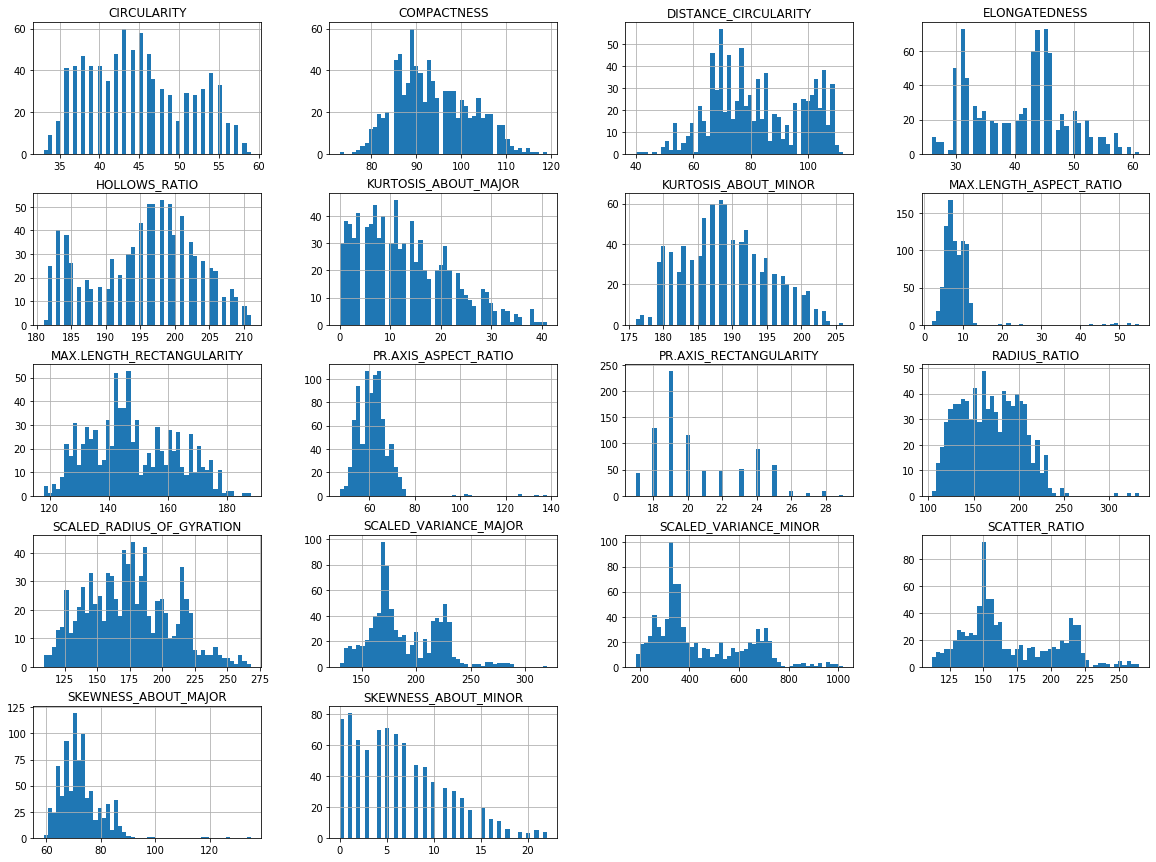

In [192]:

import matplotlib.pyplot as plt
import matplotlib as mp
mp.rcParams['figure.figsize']=(9,9)
dataset.hist(figsize=(20,15),bins=50)
plt.show()

In [193]:
dataset.skew(axis=0,skipna=True)

COMPACTNESS                  0.381271
CIRCULARITY                  0.262799
DISTANCE_CIRCULARITY         0.107221
RADIUS_RATIO                 0.390706
PR.AXIS_ASPECT_RATIO         3.821560
MAX.LENGTH_ASPECT_RATIO      6.778394
SCATTER_RATIO                0.605779
ELONGATEDNESS                0.047845
PR.AXIS_RECTANGULARITY       0.770684
MAX.LENGTH_RECTANGULARITY    0.256359
SCALED_VARIANCE_MAJOR        0.651814
SCALED_VARIANCE_MINOR        0.835837
SCALED_RADIUS_OF_GYRATION    0.280231
SKEWNESS_ABOUT_MAJOR         2.072583
SKEWNESS_ABOUT_MINOR         0.773792
KURTOSIS_ABOUT_MAJOR         0.689325
KURTOSIS_ABOUT_MINOR         0.248541
HOLLOWS_RATIO               -0.226341
dtype: float64

Feature slection and reduction , becuase not every feature affects the label

In [0]:
pearsoncorr=dataset.corr('pearson')


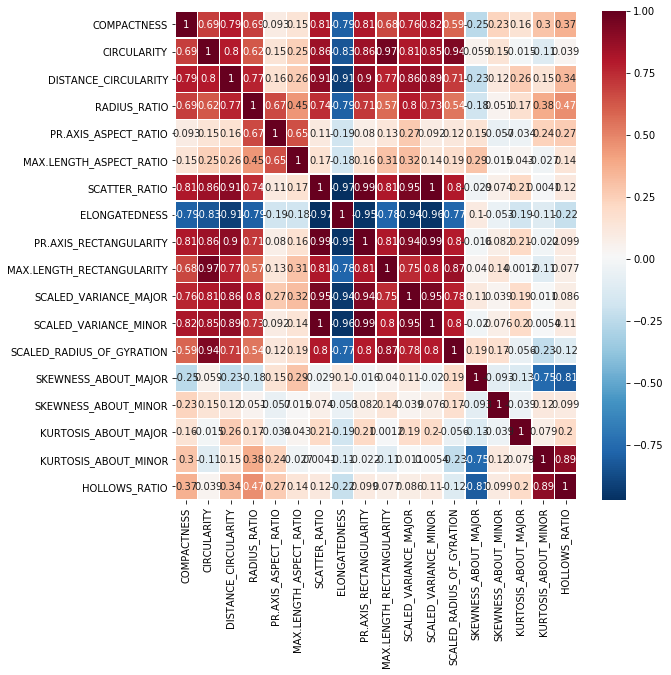

In [195]:
import seaborn as sb
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [0]:
# category_df=dataset.select_dtypes(include=['object','int'])
# dummy_df=pd.get_dummies(category_df)
# dummy_df['Class']=dataset['Class']
# dummy_df.head()

In [197]:
dataset.head()

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


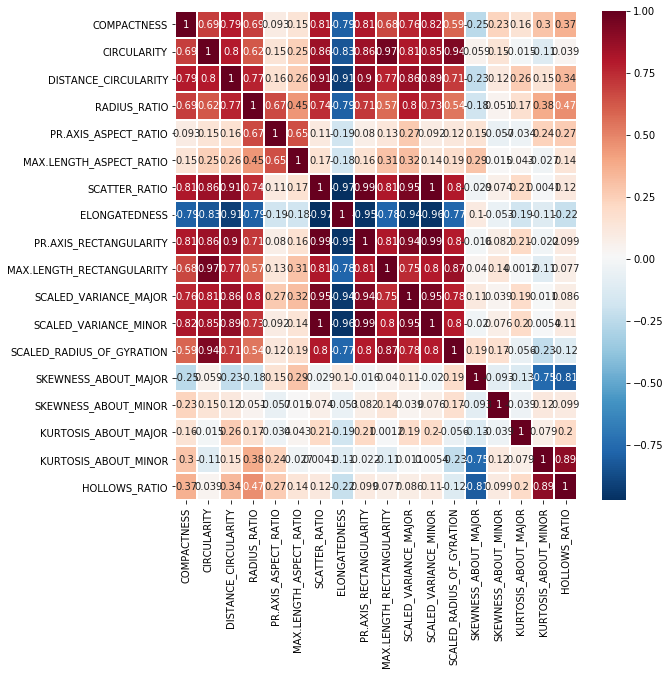

In [198]:
pearsoncorr2=dataset.corr('pearson')
sb.heatmap(pearsoncorr2, 
            xticklabels=pearsoncorr2.columns,
            yticklabels=pearsoncorr2.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=1)

So from abobe heatmaps the most correlated values to Class are skewness_about_major,pr.axis_rectangularity,scaled_variance_minor, elongatedness

*now making dataframe only with these features and splitting it to train and test datasets

In [199]:
# labels=dataset['Class']
dataset=dataset.drop(['COMPACTNESS','CIRCULARITY', 'DISTANCE_CIRCULARITY', 'RADIUS_RATIO', 'PR.AXIS_ASPECT_RATIO',  'MAX.LENGTH_ASPECT_RATIO', 'SCATTER_RATIO', 'MAX.LENGTH_RECTANGULARITY', 'SCALED_VARIANCE_MAJOR' ,'SCALED_RADIUS_OF_GYRATION', 'SKEWNESS_ABOUT_MINOR', 'KURTOSIS_ABOUT_MAJOR', 'KURTOSIS_ABOUT_MINOR', 'HOLLOWS_RATIO'], axis=1)
dataset=pd.get_dummies(dataset)
dataset.head()




,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,SCALED_VARIANCE_MINOR,SKEWNESS_ABOUT_MAJOR,Class_bus,Class_opel,Class_saab,Class_van
0,42,20,379,70,0,0,0,1
1,45,19,330,72,0,0,0,1
2,32,23,635,73,0,0,1,0
3,46,19,309,63,0,0,0,1
4,45,19,325,127,1,0,0,0


In [200]:
print("Correlation of other features with Class_bus")
print(dataset.corr().abs()['Class_bus'].sort_values(ascending=False))
print("Correlation of other features with Class_van")
print(dataset.corr().abs()['Class_van'].sort_values(ascending=False))
print("Correlation of other features with Class_saab")
dataset.corr().abs()['Class_saab'].sort_values(ascending=False)
print("Correlation of other features with Class_opel")
dataset.corr().abs()['Class_opel'].sort_values(ascending=False)

Correlation of other features with Class_bus
Class_bus                 1.000000
SKEWNESS_ABOUT_MAJOR      0.367064
Class_saab                0.346061
Class_opel                0.340700
Class_van                 0.326755
ELONGATEDNESS             0.061819
SCALED_VARIANCE_MINOR     0.029972
PR.AXIS_RECTANGULARITY    0.002126
Name: Class_bus, dtype: float64
Correlation of other features with Class_van
Class_van                 1.000000
ELONGATEDNESS             0.497688
SCALED_VARIANCE_MINOR     0.445056
PR.AXIS_RECTANGULARITY    0.429196
Class_bus                 0.326755
Class_saab                0.325746
Class_opel                0.320699
SKEWNESS_ABOUT_MAJOR      0.023475
Name: Class_van, dtype: float64
Correlation of other features with Class_saab
Correlation of other features with Class_opel


Class_opel                1.000000
Class_bus                 0.340700
Class_saab                0.339647
Class_van                 0.320699
ELONGATEDNESS             0.226391
PR.AXIS_RECTANGULARITY    0.224750
SCALED_VARIANCE_MINOR     0.224726
SKEWNESS_ABOUT_MAJOR      0.179344
Name: Class_opel, dtype: float64

Keeping these 4 features, we discard the rest as they are assumed to be noise

In [0]:
# df2=dataset.drop(['PR.AXIS_RECTANGULARITY','SCALED_VARIANCE_MINOR','SKEWNESS_ABOUT_MAJOR'], axis=1)

#df2.insert(5,"Class","0")
#df2['Class']=dummy_df['Class']
# dataset.head()


In [201]:
from sklearn.model_selection import train_test_split
# labels=dataset['Class']
X_train,X_test,Y_train,Y_test=train_test_split(dataset,labels ,test_size=0.25 , random_state=42)
X_train

,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,SCALED_VARIANCE_MINOR,SKEWNESS_ABOUT_MAJOR,Class_bus,Class_opel,Class_saab,Class_van
559,31,24,698,72,0,0,1,0
615,48,18,284,62,0,1,0,0
658,48,18,289,62,0,0,0,1
302,41,19,385,70,1,0,0,0
671,38,21,455,65,0,1,0,0
...,...,...,...,...,...,...,...,...
71,30,25,732,70,0,1,0,0
106,34,23,575,65,0,1,0,0
270,45,19,322,80,1,0,0,0
435,51,18,253,65,0,0,0,1


In [0]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
# X_train

In [0]:
# from sklearn.linear_model import LogisticRegression
# logreg = LogisticRegression()
# logreg.fit(X_train, Y_train)
# print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(logreg.score(X_train, Y_train)))
# print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, Y_test)))

In [0]:
# from sklearn.tree import DecisionTreeClassifier
# clf = DecisionTreeClassifier().fit(X_train, Y_train)
# print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(clf.score(X_train, Y_train)))
# print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(clf.score(X_test, Y_test)))

In [0]:
# from sklearn.ensemble import RandomForestClassifier
# clf = RandomForestClassifier(n_jobs=2, random_state=0)

# clf.fit(X_train, Y_train)
# RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
#             max_depth=None, max_features='auto', max_leaf_nodes=None,
#             min_impurity_split=1e-07, min_samples_leaf=1,
#             min_samples_split=2, min_weight_fraction_leaf=0.0,
#             n_estimators=10, n_jobs=2, oob_score=False, random_state=0,
#             verbose=0, warm_start=False)
# preds = clf.predict(X_test)
# print(preds)

In [0]:
# pd.crosstab(Y_test, preds, rownames=['Actual Result'], colnames=['Predicted Result'])


In [206]:
dict_classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(n_estimators=1000),
    "Decision Tree": tree.DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=1000),
    "Neural Net": MLPClassifier(alpha = 1),
    "Naive Bayes": GaussianNB(),
    
}
def batch_classify(X_train, Y_train, X_test, Y_test, no_classifiers = 5, verbose = True):
    """
    This method, takes as input the X, Y matrices of the Train and Test set.
    And fits them on all of the Classifiers specified in the dict_classifier.
    The trained models, and accuracies are saved in a dictionary. The reason to use a dictionary
    is because it is very easy to save the whole dictionary with the pickle module.
    
    Usually, the SVM, Random Forest and Gradient Boosting Classifier take quiet some time to train. 
    So it is best to train them on a smaller dataset first and 
    decide whether you want to comment them out or not based on the test accuracy score.
    """
    
    dict_models = {}
    for classifier_name, classifier in list(dict_classifiers.items())[:no_classifiers]:
        t_start = time.clock()
        classifier.fit(X_train, Y_train)
        t_end = time.clock()
        
        t_diff = t_end - t_start
        train_score = classifier.score(X_train, Y_train)
        test_score = classifier.score(X_test, Y_test)
        
        dict_models[classifier_name] = {'model': classifier, 'train_score': train_score, 'test_score': test_score, 'train_time': t_diff}
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=classifier_name, f=t_diff))
    return dict_models
 
 
 
def display_dict_models(dict_models, sort_by='test_score'):
    cls = [key for key in dict_models.keys()]
    test_s = [dict_models[key]['test_score'] for key in cls]
    training_s = [dict_models[key]['train_score'] for key in cls]
    training_t = [dict_models[key]['train_time'] for key in cls]
    
    df_ = pd.DataFrame(data=np.zeros(shape=(len(cls),4)), columns = ['classifier', 'train_score', 'test_score', 'train_time'])
    for ii in range(0,len(cls)):
        df_.loc[ii, 'classifier'] = cls[ii]
        df_.loc[ii, 'train_score'] = training_s[ii]
        df_.loc[ii, 'test_score'] = test_s[ii]
        df_.loc[ii, 'train_time'] = training_t[ii]
    
    display(df_.sort_values(by=sort_by, ascending=False))
dict_models = batch_classify(X_train, Y_train, X_test, Y_test, no_classifiers = 8)
display_dict_models(dict_models)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


trained Logistic Regression in 0.06 s
trained Nearest Neighbors in 0.00 s
trained Linear SVM in 0.02 s
trained Gradient Boosting Classifier in 2.41 s
trained Decision Tree in 0.00 s
trained Random Forest in 1.46 s
trained Neural Net in 0.53 s
trained Naive Bayes in 0.01 s


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,classifier,train_score,test_score,train_time
3,Gradient Boosting Classifier,1.000000,1.000000,2.413320
4,Decision Tree,1.000000,1.000000,0.001859
5,Random Forest,1.000000,1.000000,1.458519
6,Neural Net,1.000000,1.000000,0.531669
7,Naive Bayes,1.000000,1.000000,0.006375
0,Logistic Regression,0.771293,0.797170,0.058244
1,Nearest Neighbors,0.700315,0.561321,0.002356
2,Linear SVM,0.408517,0.405660,0.023435
